In [1]:
import random

random.seed(0)

import numpy as np 
np.random.seed(0)

import tensorflow as tf 
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 

In [3]:
#load data 

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [7]:
#len images 
print(len(train_images))
print(len(train_labels))
print(train_images[0].shape)




60000
60000
(28, 28)


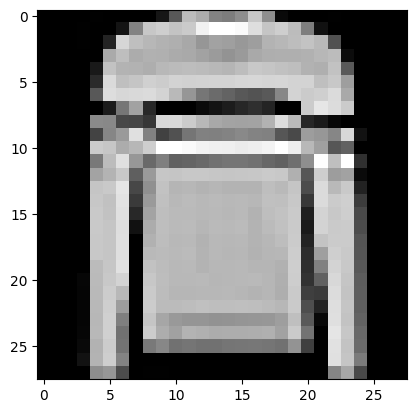

In [14]:
plt.imshow(train_images[5],cmap='gray')
plt.show()

In [15]:
print (train_labels[5])

2


class_names =['t-shirt/top','trousser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

data processing 

In [16]:
#normalize pixel values to be between 0 and 1
train_images, test_images= train_images/255.0,test_images/255.0


In [17]:
#reshape images tp specify (grayscale)

train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))